<a href="https://colab.research.google.com/github/lakshayb5/Deep-Learning-/blob/master/Intro_to_Deep_Learning_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [18]:
mnist = tf.keras.datasets.mnist # 28x28 images of handwritten digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #Hidden layer with 128 neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output Layer with number of classification (10)
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)
# The result here is in-sample

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2650 - acc: 0.9222
Epoch 2/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1078 - acc: 0.9660
Epoch 3/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0730 - acc: 0.9765


In [19]:
# validation loss and accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0977 - acc: 0.9693
0.097667738552019 0.9693


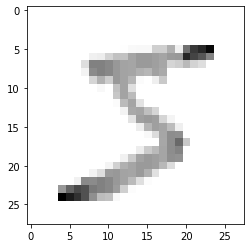

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [0]:
model.save('number_reader.model')

In [0]:
new_model = tf.keras.models.load_model('number_reader.model')

In [0]:
predictions = new_model.predict(x_test)
#print(predictions)

In [26]:
import numpy as np

print(np.argmax(predictions[1]))

2


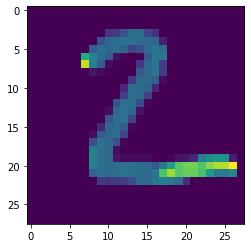

In [27]:
plt.imshow(x_test[1])
plt.show()